# Exercises

Do your work for this exercise in a jupyter notebook named hypothesis_testing.ipynb.

For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

- Has the network latency gone up since we switched internet service providers?

1. Null = The latency between the new and old service providers remained the same.

2. Alternative = The latency between the new and old service providers has increased.

3. true positive = The latency shows an average difference of 10 seconds

4. true negative = The latency shows an average difference of .00001 seconds

5. type I = The latency shows an average difference of .05 seconds but it is not noticeable

6. type II = The latency shows an average difference of .03

- Is the website redesign any good?

1. Null = Click through rate is the same.
2. Alternative = Higher click through rate.
3. true positive = Click rates did not change
4. true negative = Click rates increased by 1000
5. type I = Click rates only increased by 10.
6. type II = Click rates decreased by 10.


- Is our television ad driving more sales

1. Null = Sales have remained the same, did not increase or decrease.
2. Alternative = Sales have increased.
3. true positive = Sales remained the same.
4. true negative = Sales increased by $10, 000 from last year.
5. type I = Sales only increased by $100.
6. type II = Sales decreased by $100.

# Exercises T-Test

1. Answer with the type of test you would use (assume normal distribution):

- Is there a difference in grades of students on the second floor compared to grades of all students?

A. One sample T-Test, 2-tail

- Are adults who drink milk taller than adults who dont drink milk?

A. Independent T-Test, 1-tail

- Is the the price of gas higher in texas or in new mexico?

A. Independent t-test, 1-tail

- Are there differences in stress levels between students who take data science vs students who take web development vs students who take cloud academy?

A. ANOVA

2. Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [100]:
alpha = .05

In [105]:
sample1 = 40
mean1 = 90
std_dev1 = 15

sample2 = 50
mean2 = 100
std_dev2 = 20

office1 = stats.norm(mean1, std_dev1).cdf(sample1)
office2 = stats.norm(mean2, std_dev2).cdf(sample2)

In [106]:
office1, office2

(0.0004290603331968372, 0.006209665325776132)

(array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]),
 array([-0.49379033, -0.39379033, -0.29379033, -0.19379033, -0.09379033,
         0.00620967,  0.10620967,  0.20620967,  0.30620967,  0.40620967,
         0.50620967]),
 <BarContainer object of 10 artists>)

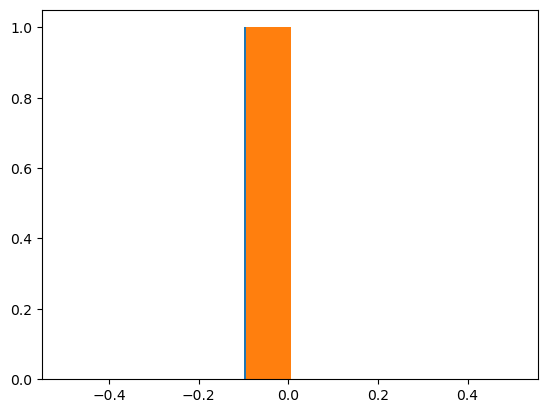

In [110]:
plt.hist(office1)
plt.hist(office2)

In [111]:
from scipy import stats
from pydataset import data

In [112]:
office_one = stats.norm(90, 15)
office_two = stats.norm(100, 20)

In [113]:
dist_one = office_one.rvs(40)
dist_two = office_two.rvs(50)

In [115]:
dist_one.var(), dist_two.var()

(262.0807621971434, 458.86090943362376)

In [116]:
stats.levene(dist_one, dist_two)

LeveneResult(statistic=0.4428292043999735, pvalue=0.5075005260197754)

In [119]:
t, p = stats.ttest_ind(dist_two, dist_one, equal_var=False)
t, p

(1.688031764751321, 0.09495555821049692)

Null: There's no diference between the two distrtibutions
Alternative: there's a significant difference between the two distributions

In [120]:
alpha = .05

if p <= alpha:
    print('Reject null')
else:
    print('Fail to reject null')
    # 

Fail to reject null


Takeaway: we rejected the null hypothesis, there is a signficant difference between the two offices

3. Load the mpg dataset and use it to answer the following questions:

In [21]:
#import seaborn as sns
#mpg = sns.load_dataset('mpg')
from pydataset import data
mpg = data('mpg')
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import env


- Is there a difference in fuel-efficiency in cars from 2008 vs 1999? Independent Test

In [27]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [26]:
alpha = .05

In [3]:
mpg.year.value_counts()

1999    117
2008    117
Name: year, dtype: int64

In [4]:
mpg.isna().sum()

mpg = mpg[~mpg.hwy.isna()]
mpg = mpg[~mpg.year.isna()]
mpg.isna().sum()

manufacturer    0
model           0
displ           0
year            0
cyl             0
trans           0
drv             0
cty             0
hwy             0
fl              0
class           0
dtype: int64

<AxesSubplot:>

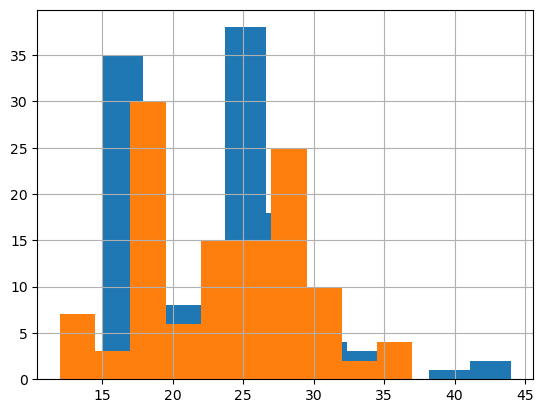

In [16]:
mpg[mpg.year==1999].hwy.hist()
mpg[mpg.year==2008].hwy.hist()

In [17]:
ninety_nine = mpg[mpg.year==1999].hwy
zero_eight = mpg[mpg.year==2008].hwy

In [25]:
zero_eight.head()
#ninety_nine.head()

3     31
4     30
7     27
10    28
11    27
Name: hwy, dtype: int64

In [20]:
stats.levene(ninety_nine, zero_eight)

LeveneResult(statistic=0.0212016152523693, pvalue=0.8843574825616618)

In [22]:
t, p = stats.ttest_ind(ninety_nine, zero_eight, equal_var=False)

if p < .05:
    print('There is a significant difference between the fuel-efficiency of vehicles in 1999 and 2008')
else:
    print('We fail to find a signficant difference')

We fail to find a signficant difference


In [122]:
mpg['fuel_eff'] = (mpg['cty'] + mpg['hwy']) / 2
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,fuel_eff
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [125]:
new_eff = mpg[mpg['year'] == 2008]['fuel_eff']
old_eff = mpg[mpg['year'] == 1999]['fuel_eff']

In [126]:
new_eff.var(), old_eff.var()

(24.097480106100797, 27.122605363984682)

Null: there is no difference in fuel efficiency between cars made in 2008 and 1999
Alternative: there is a significant difference in fuel efficiency between cars made in 2008 and 1999

In [128]:
t2, p2 = stats.ttest_ind(new_eff, old_eff, equal_var=False)
t2, p2

(-0.21960177245940962, 0.8263750772060638)

In [129]:
alpha = .05

if p <= alpha:
    print('Reject null')
else:
    print('Fail to reject null')

Fail to reject null


Takeaway: we failed to reject the null hypothesis, there is no signficant difference in fuel efficiency between cars made in 1999 and 2008.

- Are compact cars more fuel-efficient than the average car? one-sample test, 1-tail

In [37]:
mpg.isna().sum()
mpg = mpg[~mpg.hwy.isna()]
mpg.isna().sum()

manufacturer    0
model           0
displ           0
year            0
cyl             0
trans           0
drv             0
cty             0
hwy             0
fl              0
class           0
dtype: int64

In [42]:
mpg['class'].value_counts()

suv           62
compact       47
midsize       41
subcompact    35
pickup        33
minivan       11
2seater        5
Name: class, dtype: int64

<AxesSubplot:>

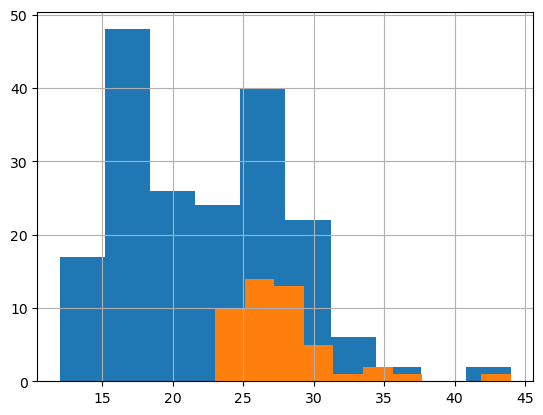

In [46]:
mpg[mpg['class'] != 'compact'].hwy.hist()
mpg[mpg['class'] == 'compact'].hwy.hist()

In [48]:
normal_car = mpg[mpg['class'] != 'compact'].hwy
compact_car = mpg[mpg['class'] == 'compact'].hwy

In [49]:
stats.levene(normal_car, compact_car)

LeveneResult(statistic=20.48883757052893, pvalue=9.586415103710692e-06)

In [50]:
t, p = stats.ttest_ind(normal_car, compact_car, equal_var=False)

if p < .05:
    print('There is a significant difference between the fuel-efficiency of normal cars and compact cars')
else:
    print('We fail to find a signficant difference')

There is a significant difference between the fuel-efficiency of normal cars and compact cars


null: compact cars are not more efficeint than the average car
alternative: compact cars are more efficient than the average car

In [132]:
compact_eff = mpg[mpg['class'] == 'compact']['fuel_eff']
mean_eff = mpg['fuel_eff'].mean()


In [134]:
t3, p3 = stats.ttest_1samp(compact_eff, mean_eff)
t3, p3

(7.896888573132533, 4.198563794317163e-10)

In [135]:
alpha = .05

if t3 > 0 and p3/2 <= alpha:
    print('Reject null')
else:
    print('Fail to reject null')

Reject null


Takeaway: reject the null hypothesis, compact cars are significantly more efficient than the average car

- Do manual cars get better gas mileage than automatic cars? Independent test, 1-tail

In [55]:
mpg.trans.value_counts()

auto(l4)      83
manual(m5)    58
auto(l5)      39
manual(m6)    19
auto(s6)      16
auto(l6)       6
auto(av)       5
auto(s5)       3
auto(s4)       3
auto(l3)       2
Name: trans, dtype: int64

<AxesSubplot:>

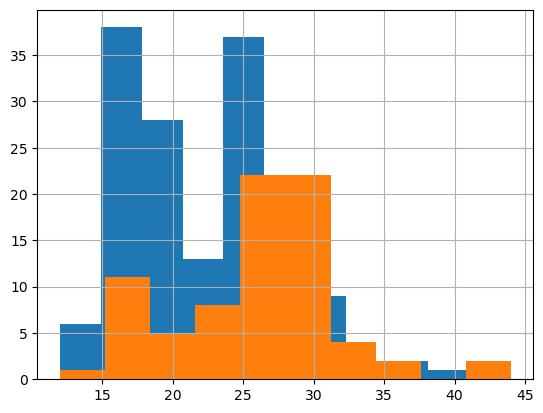

In [62]:
mpg[mpg['trans'].str.startswith('a')].hwy.hist()
mpg[mpg['trans'].str.startswith('m')].hwy.hist()

In [95]:
automatic = mpg[mpg['trans'].str.startswith('a')].hwy
manual = mpg[mpg['trans'].str.startswith('m')].hwy

In [98]:
automatic.head()

1    29
4    30
5    26
7    27
9    25
Name: hwy, dtype: int64

In [97]:
stats.levene(automatic, manual)

LeveneResult(statistic=1.190286842268245, pvalue=0.2764034768395809)

In [99]:
t, p = stats.ttest_ind(automatic, manual, equal_var=False)

if p < .05:
    print('There is a significant difference between the fuel-efficiency of automatic and manual transmissions')
else:
    print('We fail to find a signficant difference')

There is a significant difference between the fuel-efficiency of automatic and manual transmissions


Null: manual cars are not more efficient than automatics
Alternative: manual cars are more efficient than automatics

In [136]:
manual_eff = mpg[mpg['trans'].str.startswith('m')]['fuel_eff']
auto_eff = mpg[mpg['trans'].str.startswith('a')]['fuel_eff']

In [137]:
manual_eff.var(), auto_eff.var()

(26.635167464114826, 21.942777233382337)

In [138]:
t4, p4 = stats.ttest_ind(manual_eff, auto_eff, equal_var=False)
t4, p4

(4.443514012903072, 1.7952248999917893e-05)

In [139]:
alpha = .05

if t4 > 0 and p4/2 < alpha:
    print('Reject null')
else:
    print('Fail to reject null')

Reject null


Takeaway: manual cars are significantly more efficient than automatic cars

# Exercises - Correlation

ttest : var1 = cat./discreet, var2 = continuous
ANOVA: var1 = cat./discreet, var2 = continous

Above compares the means

PearsonsR = var1 = continuous, var2 = continuous

Above compares linear correlation

1. Answer with the type of stats test you would use (assume normal distribution):

- Is there a relationship between the length of your arm and the length of your foot?

A. Pearson's R or Pearmans

- Do guys and gals quit their jobs at the same rate?

A. Independent t-test, 2-tail

- Does the length of time of the lecture correlate with a students grade?

A. Pearson's R or Spearmans

2. Use the telco_churn data

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from math import sqrt

from scipy import stats
from pydataset import data

In [26]:
db_url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/telco_churn'
df = pd.read_sql('SELECT * FROM customers', db_url)  
df

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,No,Yes,Yes,No,2,Yes,2,65.60,593.3,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,No,Yes,1,No,2,59.90,542.4,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,Yes,No,No,No,1,Yes,1,73.90,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,Yes,No,Yes,Yes,1,Yes,1,98.00,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,No,Yes,Yes,No,1,Yes,2,83.90,267.4,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,0,No,No,13,Yes,No,1,Yes,...,No,Yes,No,No,2,No,2,55.15,742.9,No
7039,9992-RRAMN,Male,0,Yes,No,22,Yes,Yes,2,No,...,No,No,No,Yes,1,Yes,1,85.10,1873.7,Yes
7040,9992-UJOEL,Male,0,No,No,2,Yes,No,1,No,...,No,No,No,No,1,Yes,2,50.30,92.75,No
7041,9993-LHIEB,Male,0,Yes,Yes,67,Yes,No,1,Yes,...,Yes,Yes,No,Yes,3,No,2,67.85,4627.65,No


- Does tenure correlate with monthly charges?

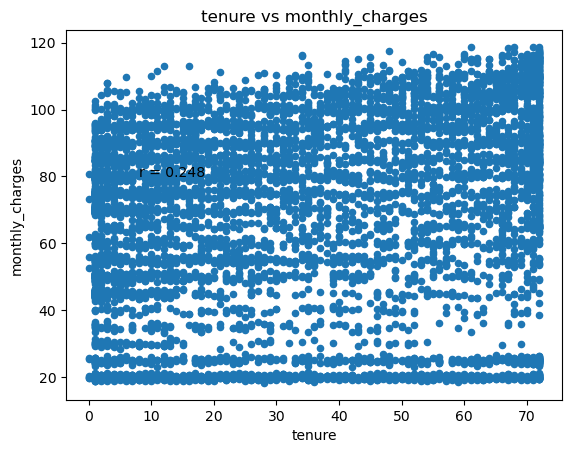

In [6]:
r, p = stats.pearsonr(df.tenure, df.monthly_charges)


df.plot.scatter('tenure', 'monthly_charges')


plt.title('tenure vs monthly_charges')


plt.text(8, 80, f'r = {r:.3f}')

plt.show()

In [7]:


r_tenure_monthly_charges, _ = stats.pearsonr(df.tenure, df.monthly_charges)



print('Correlation between tenure and monthly_charges')
print(f'  r = {r_tenure_monthly_charges:.3f}')




Correlation between tenure and monthly_charges
  r = 0.248


1. state our hypothesis, set our alpha value
2. select the data
3. plot the data
4. test for assumptions (normal distribution for correlation) 
5. run test
6. draw conclusions


Hypothesis:
    
H_0: there is no linear correlation between tenure and monthly charges.
H_a: there is a lnear correlation between tenure and monthly charges.

<AxesSubplot:xlabel='tenure', ylabel='monthly_charges'>

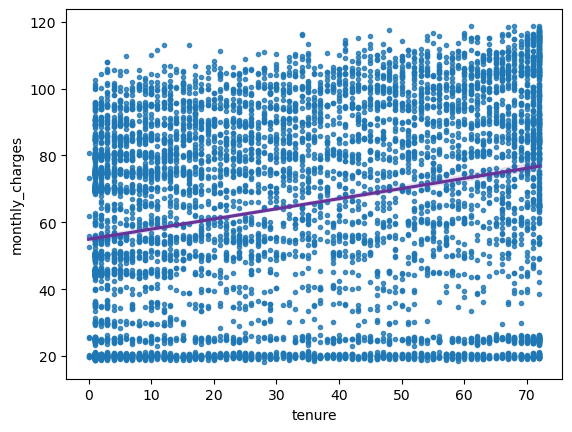

In [32]:
charges_df = df[['monthly_charges', 'tenure']]
charges_df

# Plot the datat
sns.regplot(x='tenure', y='monthly_charges', data=charges_df, marker='.', line_kws={'color': 'rebeccapurple'})


<AxesSubplot:>

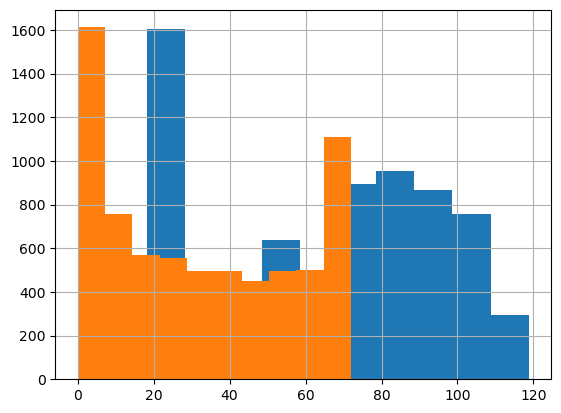

In [34]:
# distributions of the data to check for normalcy
charges_df.monthly_charges.hist()
charges_df.tenure.hist()

These distributions are not normal, so we will use a Spearmans test.

In [49]:
alpha = .05
r, p = stats.spearmanr(charges_df.tenure, charges_df.monthly_charges)

def eval_result(alpha, p): # use a function so that you do not have to keep copying and pasting the if loop
    
    if p < alpha: # test the hypothesis for rejecting or accepting the null hypothesis
        return print(f'reject the null hypothesis. there is a linear correlation. (p-value: {p})')
    else:
        return print(f'we fail to reject the null hypothesis that there is a linear correlation between monthly charges and tenure. (p-vlaue: {p})')

In [51]:
eval_result(alpha, p) # we call on our function to show the results

reject the null hypothesis. there is a linear correlation. (p-value: 1.0271266876409408e-123)


**Takeaways**

There is a correlation between monthly charges and tenure.
With a r of .28, we can say the correlation is weak to moderate # The lower the r value the less evidence to support the correlation between the two variables. The closer the value is to 1, the stronger the correlation.

- Total charges?

1. state our hypothesis, set our alpha value
2. select the data, check for nulls through .info()
3. plot the data
4. test for assumptions (normal distribution for correlation) 
5. run test
6. draw conclusions

Hypothesis:
    
H_0: There is no linear correlation between tenure and total charges.  
H_a: There is a linear correlation between tenure and total charges.



In [44]:
alpha = .05

# select the data
ttl_charges_df = df[['tenure', 'total_charges']]

# look at a summary of the dataframe
#ttl_charges_df.info()

# try to find the data errors
ttl_charges_df.total_charges.sort_values()

# convert the empty space to '0' by replacing the spaces with a '0' we eliminate the null and then turn the string to a float using the .astype method.
ttl_charges_df['total_charges'] = ttl_charges_df['total_charges'].str.replace(' ', '0').astype('float')

# confirm our datatypes
ttl_charges_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tenure         7043 non-null   int64  
 1   total_charges  7043 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 110.2 KB


/var/folders/2g/_40bymd11_x47n42bls8ypmr0000gn/T/ipykernel_2512/3746844221.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ttl_charges_df['total_charges'] = ttl_charges_df['total_charges'].str.replace(' ', '0').astype('float')


<AxesSubplot:xlabel='tenure', ylabel='total_charges'>

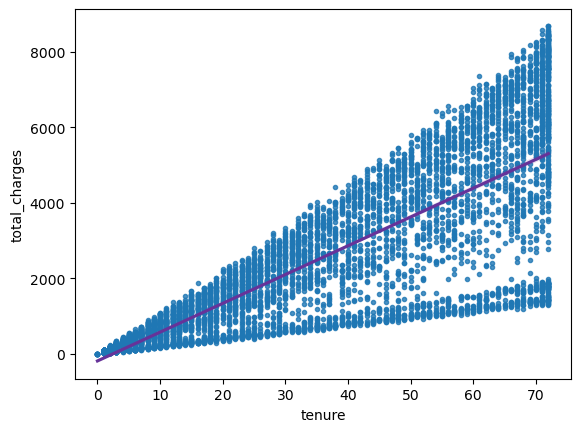

In [45]:
# plot the data
sns.regplot(x='tenure', y='total_charges', data = ttl_charges_df, marker='.', line_kws = {'color': 'rebeccapurple'})

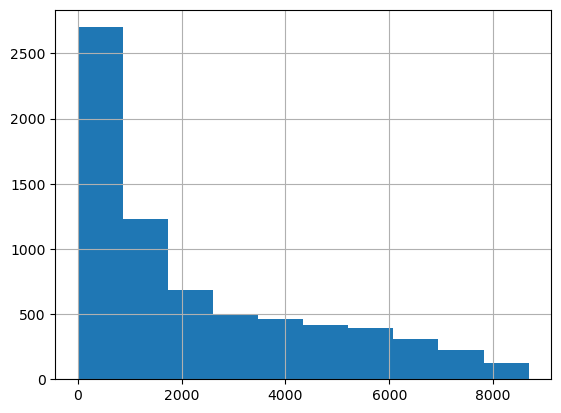

<function matplotlib.pyplot.show(close=None, block=None)>

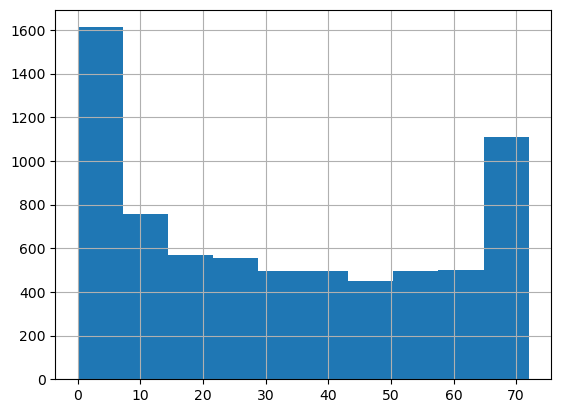

In [46]:
# check assumptions
ttl_charges_df.total_charges.hist()
plt.show()
ttl_charges_df.tenure.hist()
plt.show

Because these are not normally distributed, we will use a speaman's test.

In [53]:
# run our test
r, p = stats.spearmanr(ttl_charges_df.tenure, ttl_charges_df.total_charges)
eval_result(alpha, p)
r

reject the null hypothesis. there is a linear correlation. (p-value: 0.0)


0.8896957900597577

**Takeaway**

There is a linear correlation between tenure and total charges.  
With a r of .89, we can say the correlation is strong.

- What happens if you control for phone and internet service?

Let's look at customers who have phone service and no internet.

1. state our hypothesis, set our alpha value
2. select the data, check for nulls run a .info()
3. plot the data
4. test for assumptions (normal distribution for correlation) 
5. run test
6. draw conclusions

Of customers who have only phone service:
H_0: there is no linear correlation between tenure and montly charges.
H_a: there is a linear correlation between tenure and montly charges.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1739 entries, 0 to 7041
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tenure           1739 non-null   int64  
 1   monthly_charges  1739 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 40.8 KB


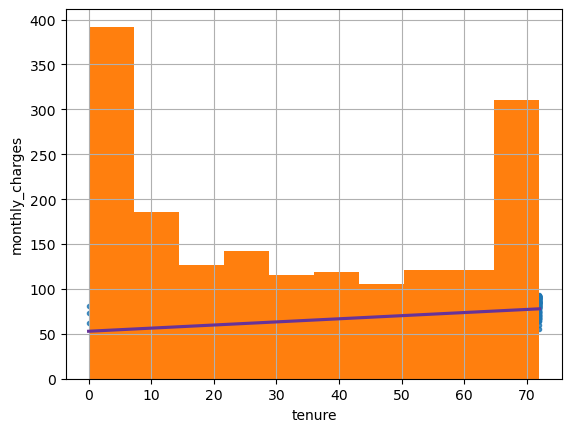

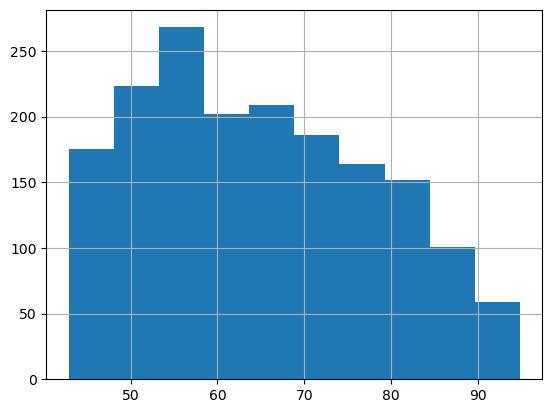

In [57]:
# set alhpa
alpha = .05

#select the data where the column phone_service says "yes" and where the column internet_service_type_id is a one.
phone_df = df[(df.phone_service == 'Yes') & (df.internet_service_type_id == 1)][['tenure', 'monthly_charges']]

# look at info
phone_df.info()

# plot the data
sns.regplot(x='tenure', y='monthly_charges', data=phone_df, marker='.', line_kws={'color': 'rebeccapurple'})

# check for normal distribution
phone_df.tenure.hist()
plt.show()
phone_df.monthly_charges.hist()
plt.show()

We will use Spearmans tst due to violation of assumption of normality.

In [60]:
r, p = stats.spearmanr(phone_df.tenure, phone_df.monthly_charges) # running the spearman test to check for the r and p values and the strength of the correlation.
eval_result(alpha, p)
print(f'r value = {r}')

reject the null hypothesis. there is a linear correlation. (p-value: 5.423601644635052e-222)
r value = 0.6644708508462759


**Takeaways**
There is a moderage-strong correlation beween tenure and monthly charges for customers who
have only phone service.

3. Use the employees database

In [79]:
url = get_db_url(env.user, env.password, env.host, db='employees') # run a sql querry joining the salaries table to the employees table to retrieve the from and to date columns along with the salaries.

query = '''
SELECT * 
FROM employees
JOIN salaries USING (emp_no)
WHERE to_date = '9999-01-01';
'''

df = pd.read_sql(query, url)
df.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,88958,2002-06-22,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,72527,2001-08-02,9999-01-01
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,43311,2001-12-01,9999-01-01
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,74057,2001-11-27,9999-01-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,94692,2001-09-09,9999-01-01


- Is there a relationship between how long an employee has been with the company and their salary?

1. state our hypothesis, set our alpha value
2. select the data, check for nulls run a .info()
3. plot the data
4. test for assumptions (normal distribution for correlation) 
5. run test
6. draw conclusions

Is there a relationship between an employee's tenure and their salary?

H_0: there is no linear correlation bertween employee tenure and salary.
H_a: there is a linear correlation between employee tenure and salary

<AxesSubplot:xlabel='tenure', ylabel='salary'>

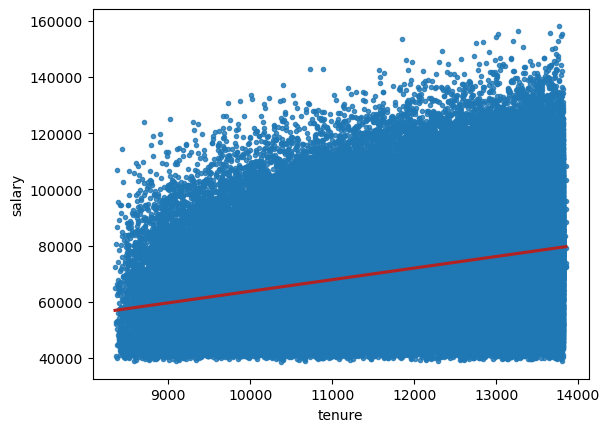

In [80]:
alpha = .05

# select our data, calulate tenure
df['tenure'] = pd.to_datetime('today') - pd.to_datetime(df.hire_date)
df['tenure'] = df.tenure.astype('str').str.split(' ', expand=True)[0].astype('int')
#df.info()
tenure_df = df[['tenure', 'salary']]

# plot the data
sns.regplot(x='tenure', y='salary', data = tenure_df, marker='.', line_kws=({'color': 'firebrick'}))

<function matplotlib.pyplot.show(close=None, block=None)>

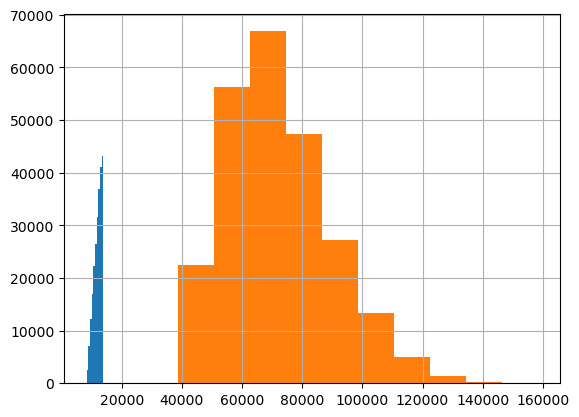

In [82]:
# look at the distribution, look for normality

tenure_df.tenure.hist()
plt.show
tenure_df.salary.hist()
plt.show

Distributions are not normal, so we will use spearmans test.

In [83]:
# run the test
r, p = stats.spearmanr(tenure_df.tenure, tenure_df.salary)

# evaluate results
eval_result(alpha, p)
print('r value', r)

reject the null hypothesis. there is a linear correlation. (p-value: 0.0)
r value 0.3128783525010577


**takeaways**

There is moderate correlation between tenure and salary.

- Is there a relationship between how long an employee has been with the company and the number of titles they have had?

H_0: there is no linear correlation between tenure and number of titles.
H_a: there is a linear correlation between tenure and number of titles.

<AxesSubplot:xlabel='tenure', ylabel='num_titles'>

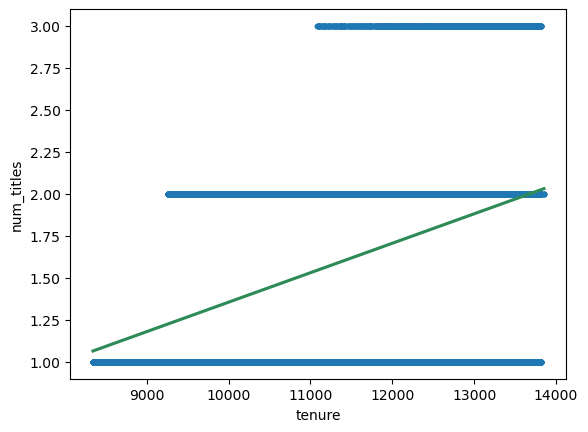

In [90]:
alpha = .05

# select the data

url = get_db_url(env.user, env.password, env.host, db='employees')

query = '''
select t.emp_no, count(t.title) as num_titles, te.tenure
from titles t
join (select emp_no, datediff(now(), min(from_date)) AS tenure
from titles
group by emp_no
having max(to_date) = '9999-01-01'
) te using (emp_no)
group by t.emp_no;
'''
df = pd.read_sql(query, url)
df = df[['num_titles', 'tenure']]

# plot the data
sns.regplot(x='tenure', y = 'num_titles', data=df, marker='.', line_kws=({'color': 'seagreen'}))


Because the number of titles is a discrete value, we should run an ANOVA or a krusal
Wallis test to test whether the average salary of those with 1 title is different
from those with 2, or 2 different from 3, etc.

Assuumptions: do they have equal variance ? are there enough observations? YES are they indepenent
    of each other YES

In [91]:
# observations:
df.num_titles.value_counts()

2    125345
1    111892
3      2887
Name: num_titles, dtype: int64

In [92]:
# equal variance?
# h_o the variance is equal

stats.levene(df.num_titles, df.tenure)

LeveneResult(statistic=718602.1569097865, pvalue=0.0)

The variances are significantly differnt; therefore we will use the Kruskal Wallis test.

In [93]:
stats.kruskal(df.num_titles, df.tenure)

KruskalResult(statistic=371488.64419334417, pvalue=0.0)

**takeaway**
There is a difference in tenure and number of titles an employee has held.

4. Use the sleepstudy data

In [74]:
from pydataset import data
df = data('sleepstudy')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 1 to 180
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Reaction  180 non-null    float64
 1   Days      180 non-null    int64  
 2   Subject   180 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 5.6 KB


,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


- Is there a relationship between days and reaction time?

- H_0: there is no linear correlation between days and reaction time
- H_a: there is a linear correlation between days and reaction time

<AxesSubplot:xlabel='Days', ylabel='Reaction'>

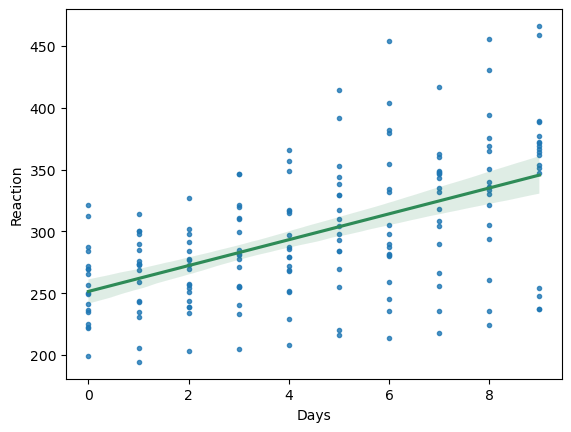

In [75]:
alpha = .05

# select the data
df = df[['Reaction', 'Days']]

# plot the data
sns.regplot(x='Days', y='Reaction', data=df, marker='.', line_kws=({'color': 'seagreen'}))

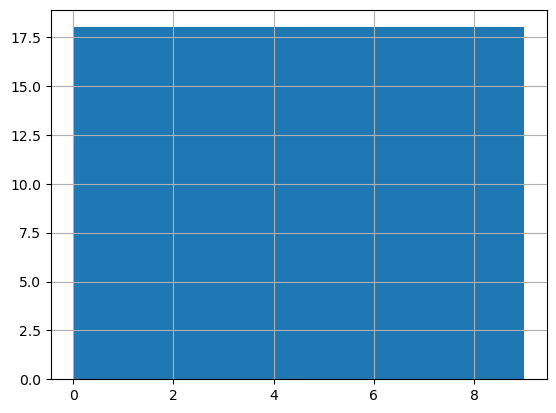

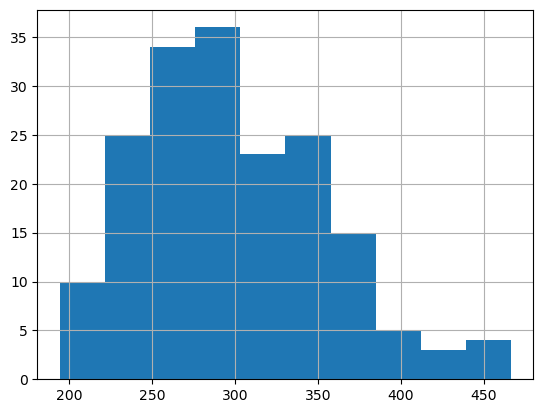

In [76]:
# check for normal distribution, plot histograms
df.Days.hist()
plt.show()
df.Reaction.hist()
plt.show()

Days is uniformly distributed, and reaction time is normally distributed.

In [77]:
# run the spearman test
r, p = stats.spearmanr(df.Days, df.Reaction)
eval_result(alpha, p)
print('r value: ', r)

reject the null hypothesis. there is a linear correlation. (p-value: 5.132878057706873e-14)
r value:  0.5228138502259547


**Takeaway**
There is a moderate correlation between days and reaction time.

# Exercises - Chi Square

1. Answer with the type of stats test you would use (assume normal distribution):
- Do students get better test grades if they have a rubber duck on their desk?

A. Chi Square

- Does smoking affect when or not someone has lung cancer?

A. Chi Square

- Is gender independent of a person’s blood type?

A. Chi Square

- A farming company wants to know if a new fertilizer has improved crop yield or not

A. Chi Square

- Does the length of time of the lecture correlate with a students grade?

A. Pearson's R

- Do people with dogs live in apartments more than people with cats?

A. Independent T-Test

2. Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.

3. Choose another 2 categorical variables from the mpg dataset and perform a  𝑐ℎ𝑖2  contingency table test with them. Be sure to state your null and alternative hypotheses.

In [96]:
import pandas as pd
from scipy import stats
from pydataset import data
import numpy as np

mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


𝐻0  (Null Hypothesis): year is independent of hwy.

𝐻𝑎  (Alternative Hypothesis): year is dependent on hwy.

In [97]:
mpg['year'].value_counts()

1999    117
2008    117
Name: year, dtype: int64

In [98]:
mpg['hwy'].value_counts()

26    32
17    31
29    22
25    15
27    14
19    13
24    13
20    11
18    10
15    10
23     7
28     7
31     7
22     7
16     7
12     5
30     4
32     4
36     2
44     2
35     2
14     2
33     2
21     2
34     1
37     1
41     1
Name: hwy, dtype: int64

In [99]:
observed = pd.crosstab(mpg.year, mpg.hwy)
observed

hwy,12,14,15,16,17,18,19,20,21,22,...,30,31,32,33,34,35,36,37,41,44
year,,,,,,,,,,,,,,,,,,,,,
1999,0,0,9,5,21,0,3,5,2,4,...,1,0,3,2,0,1,0,0,1,2
2008,5,2,1,2,10,10,10,6,0,3,...,3,7,1,0,1,1,2,1,0,0


In [100]:
alpha = .05
chi2, p, df, expected = stats.chi2_contingency(observed)

In [101]:
# print 'Observed Values' followed by a new line
print('Observed Values\n')

# print the values from the 'observed' dataframe
print(observed.values)

# print --- and then a new line, 'Expected Values', followed by another new line
print('---\nExpected Values\n')

# print the expected values array
print(expected)

# print a new line
print('---\n')

# print the chi2 value, formatted to a float with 4 digits. 
print(f'chi^2 = {chi2:.4f}') 

# print the p-value, formatted to a float with 4 digits. 
print(f'p-value = {p:.4f}')
print('Is p-value < alpha?', p < alpha)

Observed Values

[[ 0  0  9  5 21  0  3  5  2  4  2  6  6 26  6  0 12  1  0  3  2  0  1  0
   0  1  2]
 [ 5  2  1  2 10 10 10  6  0  3  5  7  9  6  8  7 10  3  7  1  0  1  1  2
   1  0  0]]
---
Expected Values

[[ 2.5  1.   5.   3.5 15.5  5.   6.5  5.5  1.   3.5  3.5  6.5  7.5 16.
   7.   3.5 11.   2.   3.5  2.   1.   0.5  1.   1.   0.5  0.5  1. ]
 [ 2.5  1.   5.   3.5 15.5  5.   6.5  5.5  1.   3.5  3.5  6.5  7.5 16.
   7.   3.5 11.   2.   3.5  2.   1.   0.5  1.   1.   0.5  0.5  1. ]]
---

chi^2 = 74.5221
p-value = 0.0000
Is p-value < alpha? True


**Takeaways**

We can see by comparing the contingency tables that the observed values are very close to the expected values. We can confirm that, with the data available, there does appear to be a significant relationship between the year of the vehicle and the hwy mileage. We reject the null hypothesis.

4. Use the data from the employees database to answer these questions:

- Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)

- Is an employee's gender independent of whether or not they are or have been a manager?